In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('final_data.csv', sep=',', encoding='utf-8')
data.head(100)

,content,sentiment
0,Top,POSITIF
1,Ooyii,POSITIF
2,habis diupdate.... aplikasi ini malah nggak bi...,NEGATIF
3,DATA SAYA DI KLAIM OLEH ORANG LAIN !!!!!!!!!! ...,NEGATIF
4,Bagus,POSITIF
...,...,...
95,"Saya sudah vaksin booster di Gor bekasi tp ,su...",NEGATIF
96,Ok,POSITIF
97,"Aplikasi asu ga kode qr ga bisa, liat hasil va...",NEGATIF
98,Mom I Ijolo Idols y.poo poppoo Milk. OOOIKM ol...,POSITIF


# Data Pre-processing

In [3]:
#proses menghilangkan unicode dan emoji
import re
def remove_emojis(content):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', content)
data['content'] = data['content'].apply(lambda x: remove_emojis(x))

#remove symbols and punctuation
def remove_symbol(content):
    content_nopunct = "" .join([c for c in content if c not in string.punctuation])
    content_nopunct = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", content_nopunct)
    return content_nopunct
data['content'] = data['content'].apply(lambda x: remove_symbol(x))
data.head(100)

,content,sentiment
0,Top,POSITIF
1,Ooyii,POSITIF
2,habis diupdate aplikasi ini malah nggak bisa d...,NEGATIF
3,DATA SAYA DI KLAIM OLEH ORANG LAIN NIK KTP PU...,NEGATIF
4,Bagus,POSITIF
...,...,...
95,Saya sudah vaksin booster di Gor bekasi tp sud...,NEGATIF
96,Ok,POSITIF
97,Aplikasi asu ga kode qr ga bisa liat hasil vak...,NEGATIF
98,Mom I Ijolo Idols ypoo poppoo Milk OOOIKM olo ...,POSITIF


In [4]:
#proses case folding

def casefolding(content):
    content = content.lower()
    content = content.strip(" ")
    content = re.sub(r'[?|$|.|!²_:")(-+,]','',content)
    content = re.sub(r"\d+", "", content)
    content = content.translate(str.maketrans("","",string.punctuation))
    content = content.strip()
    return content
data['content'] = data['content'].apply(lambda x: casefolding(x))
data.tail(100)

,content,sentiment
9377,,POSITIF
9378,apk dalam negri ribet dikit update ganggu biki...,NEGATIF
9379,update mulu kesel,NEGATIF
9380,semakin diperbaharui semakin lemot downloadnya,NEGATIF
9381,oke bet,POSITIF
...,...,...
9472,update mlu gajelas,NEGATIF
9473,aplikasi pemaksaan kalo gak di update gak bisa...,NEGATIF
9474,kok minta di update malah lodingnya ngak seles...,NEGATIF
9475,pemaksaan,NEGATIF


In [5]:
#tokenization
def tokenize(content):
    tokens = re.split(' ', content)
    return tokens
data['content'] = data['content'].apply(lambda x: tokenize(x.lower()))
data.head(100)

,content,sentiment
0,[top],POSITIF
1,[ooyii],POSITIF
2,"[habis, diupdate, aplikasi, ini, malah, nggak,...",NEGATIF
3,"[data, saya, di, klaim, oleh, orang, lain, , n...",NEGATIF
4,[bagus],POSITIF
...,...,...
95,"[saya, sudah, vaksin, booster, di, gor, bekasi...",NEGATIF
96,[ok],POSITIF
97,"[aplikasi, asu, ga, kode, qr, ga, bisa, liat, ...",NEGATIF
98,"[mom, i, ijolo, idols, ypoo, poppoo, milk, ooo...",POSITIF


In [6]:
#Proses Filtering

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stopwords_removal(content):
    factory = StopWordRemoverFactory()
    x = []
    data = []
    def myFunc(x):
        if x in factory:
            return False
        else:
            return True
    fit = filter(myFunc, content)
    for x in fit:
        data.append(x)
        return data
    data['content'] = data['content'].apply(lambda x: stopword_removal(x))


In [7]:
#proses stemiming

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in content:
        dt = stemmer.stem(w)
        do.append(dt)
        d_clean=[]
        d_clean=" ".join(do)
        print(d_clean)
        return d_clean
data['content'] = data['content'].apply(lambda x: stemming(x))


top
ooyii
habis
data
bagus
bagus
tidak

good
yay
saya
ff
keren
sangat
terima
saya
ok
scan
mau
siip
sangat
telah

vaksin
sippp
bagus
kenapa
top
ok
mudah
sekarang
good
good
ok
lupa
selalu
thank
good
mantap
baguss
saya
bagus
bagus
aplikasi
mantap

kalo
terima

saya
ok
mantap
bantu
bagus
jelek
peduli
bagus
aplikasi
moga
terima
ok
ok
baik
aplikasi
alhamdulilah
good
kalau
gk
sayaa
bisa
kenapa
baik
ok
ok
oke
p
sehat
baik
sanggat
tiap
lama
kenapa
gak
bagus
mantap
insyalloh
nyusahin
oke
bagus
tuti
ga
ok
xx
lumayan
minta
saya
ok
aplikasi
mom
baik
aplikasi
baik
bingung
okeeee
aplikasi
tolong
knpa
kenapa
ok
baik
di
baik
ok
ok
sekarang
sangat
tksi
lebih
gak
gak
bagus
sangat
baik
proses
baik
top
bagus
top
baik
nyaman
ok
susah
kecewa
sudah
bantu
good
tidak
bagus
hih
tiap
bagus
bagus
oke
bgs
lot
amazingguys
sangat
keren
ok
keep
makin
good
good
kdg
mantab
gw
kok
top
sudah
bagus
telah
jauh
ok
aplikasi
mantap
mantap
kecewa
peduli
bagus
gak
bagus
bagus
bagus
ok
bgus
n
saya
bagus
ok
lbh
baik
saya
bagussss


In [8]:
data = data.astype({'sentiment' : 'category'})
data = data.astype({'content' : 'string'})
data.dtypes

content        string
sentiment    category
dtype: object

In [9]:
data["sentiment"].value_counts()
cleanup_nums = {"sentiment":     {"NEGATIF":0, "POSITIF": 1,}}
data = data.replace(cleanup_nums)
data.head(100)

,content,sentiment
0,top,1
1,ooyii,1
2,habis,0
3,data,0
4,bagus,1
...,...,...
95,saya,0
96,ok,1
97,aplikasi,0
98,mom,1


# Deep Learning

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import csv
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.utils import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras import layers
from tensorflow.keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional
from keras.callbacks import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import spatial
from gensim.utils import simple_preprocess
from keras.preprocessing import sequence
from keras.utils.vis_utils import plot_model
from keras.models import load_model

In [11]:
#convert to numeric

maxSeqLength=30
text = data['content'].tolist()

#tokenizer to read all the words present in our dtaset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

size_of_vocabulary  = len(tokenizer.word_index) + 1

#conversion to numerical formats
encoded_text = tokenizer.texts_to_sequences(text)
max_length = maxSeqLength
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')
y = data['sentiment']

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7581, 30) (7581,)
(1896, 30) (1896,)


# Fastext 

In [13]:
%%time
from gensim.models import KeyedVectors
ar_model = KeyedVectors.load_word2vec_format("cc.id.300.vec")

Wall time: 7min 24s


In [14]:
words_not_found = []
embedding_dim = 300  
embedding_matrix = np.zeros((size_of_vocabulary, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = ar_model.get_vector(word)
    except KeyError:
        embedding_vector = None
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)

# LSTM 1 Layer

In [27]:
UNITS = 64
lr = 0.001

In [28]:
model1=Sequential()
model1.add(Embedding(size_of_vocabulary,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False))

#Lstm layer
model1.add(LSTM(UNITS,return_sequences=True,dropout=0.5))

#Global Maxpooling
model1.add(GlobalMaxPooling1D())

#Dense Layer
model1.add(Dense(UNITS, activation='relu'))

#Output layer 3 class
model1.add(Dense(3,activation='softmax')) 

model1.compile(optimizer=Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['acc']) 
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 300)           454200    
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            93440     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 551,995
Trainable params: 97,795
Non-trainable params: 454,200
___________________________________________

In [29]:
%%time
mc1 = ModelCheckpoint('best_model_f1.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
history1 = model1.fit(X_train, y_train, batch_size=64, epochs=200, validation_split=0.2, verbose=1, callbacks=[mc1])

Epoch 1/200
95/95 [==============================] - ETA: 0s - loss: 0.6791 - acc: 0.6647
Epoch 1: val_acc improved from -inf to 0.78510, saving model to best_model_f1.h5
95/95 [==============================] - 6s 38ms/step - loss: 0.6791 - acc: 0.6647 - val_loss: 0.4558 - val_acc: 0.7851
Epoch 2/200
95/95 [==============================] - ETA: 0s - loss: 0.4445 - acc: 0.8095
Epoch 2: val_acc improved from 0.78510 to 0.84443, saving model to best_model_f1.h5
95/95 [==============================] - 3s 32ms/step - loss: 0.4445 - acc: 0.8095 - val_loss: 0.3982 - val_acc: 0.8444
Epoch 3/200
95/95 [==============================] - ETA: 0s - loss: 0.4187 - acc: 0.8264
Epoch 3: val_acc did not improve from 0.84443
95/95 [==============================] - 3s 32ms/step - loss: 0.4187 - acc: 0.8264 - val_loss: 0.3781 - val_acc: 0.8444
Epoch 4/200
95/95 [==============================] - ETA: 0s - loss: 0.4081 - acc: 0.8255
Epoch 4: val_acc improved from 0.84443 to 0.84904, saving model to be

In [30]:
# Training Accuracy
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.8796


In [31]:
with open('history_f1.json', 'w') as f:
    json.dump(history1.history, f)

In [32]:
hist_f1 = json.load(open('history_f1.json'))
print(hist_f1.keys())

loss_f1 = hist_f1['loss']
val_loss_f1 = hist_f1['val_loss']
acc_f1 = hist_f1['acc']
val_acc_f1 = hist_f1['val_acc']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


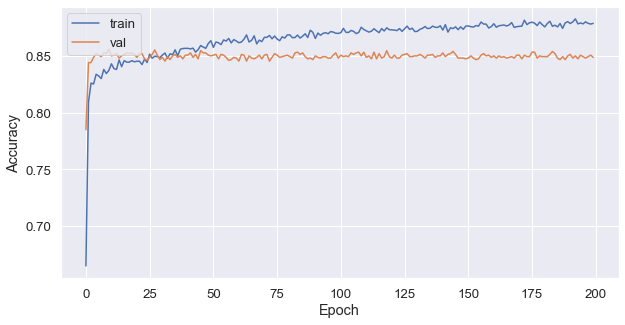

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(hist_f1['acc'])
plt.plot(hist_f1['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()
fig.savefig('FastText-1 Acc.png', dpi=400)

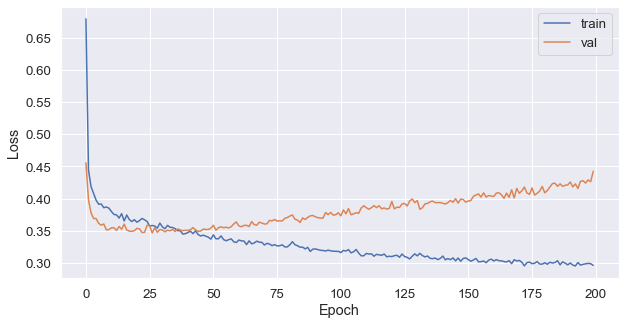

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_f1, label='train')
plt.plot(val_loss_f1, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-1 Loss.png', dpi=400)

In [35]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_f1))

Validation Accuracy: 0.8563


In [36]:
# Testing Accuracy
%time
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

Wall time: 0 ns
60/60 [==============================] - 1s 9ms/step


In [37]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[709 112]
 [149 926]], shape=(2, 2), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

    positive       0.83      0.86      0.84       821
    negative       0.89      0.86      0.88      1075

    accuracy                           0.86      1896
   macro avg       0.86      0.86      0.86      1896
weighted avg       0.86      0.86      0.86      1896



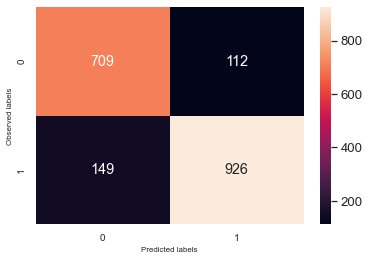

In [38]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.2) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=8);
ax.set_ylabel('Observed labels',fontsize=8);

ax.xaxis.set_ticklabels(['0', '1'],fontsize=10);
ax.yaxis.set_ticklabels(['0', '1'],fontsize=10);
plt.savefig('LSTM2.png', dpi=400)
plt.show()

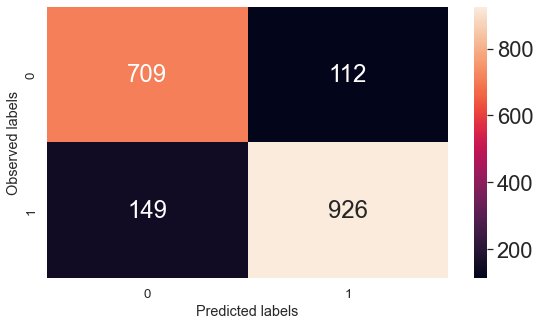

In [39]:
f, ax = plt.subplots(figsize=(9,5))
sns.set(font_scale=2.0)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted labels")
plt.ylabel("Observed labels")
plt.savefig('LSTM.png', dpi=400)
plt.show()

# LSTM 2 Layer